In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/GitHub/master-thesis

/content/drive/MyDrive/GitHub/master-thesis


# Load Daten

In [ ]:
behaviour_cols = ['Q1_2_covid_is_threat',
 'Q2_1_easy_to_follow_advice',
 'Q2_2_can_follow_advice_if_wanted',
 'Q2_3_if_follow_advice_safe',
 'Q2_4_if_follow_advice_others_safe',
 'Q2_5_follow_advice_relationships_impared',
 'Q2_6_follow_advice_life_degraded',
 'Q3_1_aware_hand_hygiene',
 'Q3_2_avoid_contact',
 'Q3_3_ensure_frequent_cleaning',
 'Q3_4_avoid_risk_groups',
 'Q3_5_keep_distance',
 'Q3_6_avoid_crowds',
 'Q3_7_minimize_activities_w_contact',
 'Q5_4_yourself_kept_distance',
 'Q5_5_feel_urge_scold',
 'Q6_2_advices_important',
 'Q6_3_others_can_avoid_spreading',
 'Q6_5_ownership_of_advice',
 'Q6_6_clear_information_on_advice_reason',
 'Q6_7_advice_limits_daily_activities',
 'Q6_9_trust_political_strategy',
 'Ny1_nr_times_wearing_masks_last_week']

In [ ]:
 data_path='data/preprocessing/220016_preprocessed_data_missing_data.csv'
 df = pd.read_csv(data_path)

In [ ]:
df_beh = df[behaviour_cols].copy()

# Scale

In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(df_beh)
df_beh_scaled = pd.DataFrame(data=x, columns=df_beh.columns.tolist())
df_beh_scaled.head()

,Q10_education,Q11_nr_members_household,Q12_nr_children_household,age_num,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,...,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy,Q7_1_last_week_fever,Q7_2_last_week_cough,Q7_3_last_week_sore_throat,Q7_4_last_week_no_smell_taste,Q7_5_last_week_shortness_breath
0,1.000000,0.0,0.000000,1.0,0.632691,0.666667,1.0,0.500000,1.0,0.500000,...,0.666667,1.0,1.000000,0.833333,0.833333,0.0,0.0,0.0,0.0,0.0
1,0.285714,0.0,0.000000,0.8,1.000000,1.000000,1.0,0.666667,1.0,0.833333,...,0.666667,1.0,0.833333,0.166667,1.000000,0.0,0.0,0.0,0.0,0.0
2,0.428571,0.0,0.000000,0.8,1.000000,1.000000,1.0,1.000000,1.0,0.500000,...,0.666667,0.5,1.000000,0.166667,1.000000,0.0,0.0,0.0,0.0,0.0
3,0.285714,0.0,0.000000,0.8,0.833333,0.000000,1.0,0.166667,0.0,1.000000,...,0.500000,0.0,1.000000,0.333333,1.000000,0.0,0.0,0.0,0.0,0.0
4,0.428571,0.2,0.166667,0.6,0.666667,0.000000,0.0,0.166667,0.0,0.166667,...,0.166667,0.0,0.166667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# Correlation Matrix

In [ ]:
corr = df_beh.corr()

In [ ]:
import plotly.express as px

fig = px.imshow(corr, width=1100, height=1100, color_continuous_scale='RdBu_r', range_color=[-1,1])
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(62),
        ticktext = corr.columns.values),
    yaxis = dict(
        tickmode = 'array',
        tickvals = np.arange(62),
        ticktext = corr.columns.values
    )
)
fig.show()

# High Correlation

In [ ]:
c = corr.abs() # auch nicht absolute Werte hinzufügen
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
so

Q10_education                        Q10_education                          1.000000
Q3_6_avoid_crowds                    Q3_6_avoid_crowds                      1.000000
age_num                              age_num                                1.000000
Q1_2_covid_is_threat                 Q1_2_covid_is_threat                   1.000000
Q2_1_easy_to_follow_advice           Q2_1_easy_to_follow_advice             1.000000
                                                                              ...   
Q2_6_follow_advice_life_degraded     Q7_1_last_week_fever                   0.000483
Q10_education                        Q6_7_advice_limits_daily_activities    0.000432
Q6_7_advice_limits_daily_activities  Q10_education                          0.000432
Q7_5_last_week_shortness_breath      Q3_4_avoid_risk_groups                 0.000079
Q3_4_avoid_risk_groups               Q7_5_last_week_shortness_breath        0.000079
Length: 961, dtype: float64

In [ ]:
threshold = 0.5
so_interesting = so[(threshold<so) & (so<1)].reset_index()
cols_to_plot = sorted(so_interesting['level_0'].unique().tolist())
so_interesting = so_interesting[so_interesting.index % 2 != 0]
so_interesting

,level_0,level_1,0
1,Q3_7_minimize_activities_w_contact,Q3_6_avoid_crowds,0.672157
3,Q3_7_minimize_activities_w_contact,Q3_2_avoid_contact,0.642536
5,Q3_2_avoid_contact,Q3_5_keep_distance,0.624215
7,Q6_5_ownership_of_advice,Q6_2_advices_important,0.609083
9,Q6_9_trust_political_strategy,Q6_2_advices_important,0.597237
11,Q6_9_trust_political_strategy,Q6_6_clear_information_on_advice_reason,0.596799
13,Q3_2_avoid_contact,Q3_6_avoid_crowds,0.580857
15,Q3_7_minimize_activities_w_contact,Q3_5_keep_distance,0.578262
17,Q3_5_keep_distance,Q5_4_yourself_kept_distance,0.575189
19,Q3_6_avoid_crowds,Q3_5_keep_distance,0.568828


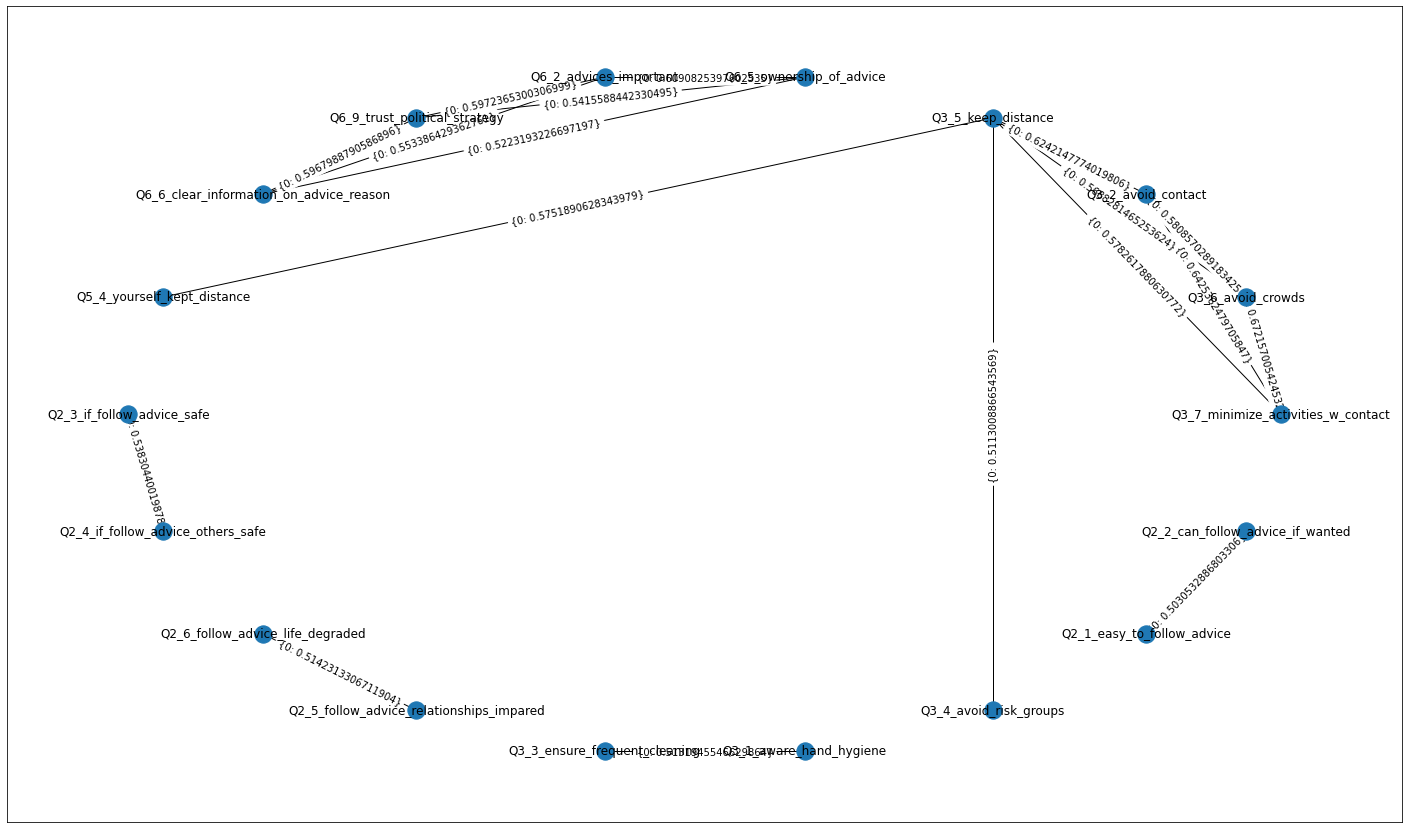

In [ ]:
import networkx as nx
G = nx.from_pandas_edgelist(so_interesting, source='level_0', target='level_1', edge_attr=0)
pos = nx.circular_layout(G)
# larger figure size
plt.figure(3,figsize=(25,15)) 
nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G,pos)
plt.show()

# Lineplots

In [ ]:
df_beh_ravg = df_beh.copy()
df_beh_ravg['date'] = df['date']
df_beh_ravg = df_beh_ravg.groupby('date').mean().rolling(7).mean().reset_index()
df_beh_ravg.dropna(inplace=True)
df_beh_ravg.head(2)

,date,Q1_2_covid_is_threat,Q2_1_easy_to_follow_advice,Q2_2_can_follow_advice_if_wanted,Q2_3_if_follow_advice_safe,Q2_4_if_follow_advice_others_safe,Q2_5_follow_advice_relationships_impared,Q2_6_follow_advice_life_degraded,Q3_1_aware_hand_hygiene,Q3_2_avoid_contact,...,Q3_7_minimize_activities_w_contact,Q5_4_yourself_kept_distance,Q5_5_feel_urge_scold,Q6_2_advices_important,Q6_3_others_can_avoid_spreading,Q6_5_ownership_of_advice,Q6_6_clear_information_on_advice_reason,Q6_7_advice_limits_daily_activities,Q6_9_trust_political_strategy,Ny1_nr_times_wearing_masks_last_week
6,2020-06-04,4.457714,5.429879,5.995965,5.569515,6.151917,4.190696,3.324468,6.290361,5.688348,...,5.341174,5.958095,2.812785,5.923318,4.656986,5.060365,5.341878,4.267165,5.165048,1.929807
7,2020-06-05,4.496958,5.459021,5.989577,5.614377,6.143397,4.186941,3.313785,6.315583,5.723173,...,5.315608,5.971393,2.779577,5.944544,4.632400,5.084945,5.362364,4.230071,5.223158,1.929807


In [ ]:
px.line(df_beh_ravg, x='date', y=cols_to_plot) #y=behaviour_cols